# Part I - Ford GoBike System Data Exploratory analysis
## by Naama Benita

## Introduction

**Ford GoBike System Data Dataset**:
The Ford GoBike System Data is an open dataset that contain detailed information about the individual rides taken using the Ford GoBike bike-sharing service in the San Francisco Bay Area. The dataset provides valuable insights into user behavior, such as trip details, timestamps, bike types and user demographic information. 

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
#Load the dataset
df = pd.read_csv("./201902-fordgobike-tripdata.csv")

In [3]:
#check the top 10 rows
df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,32:10.1,01:56.0,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,53:21.8,42:03.1,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,13:13.2,24:08.1,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,54:26.0,02:36.8,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,54:18.5,20:44.1,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,49:58.6,19:51.8,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,55:35.1,14:42.6,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,41:06.8,08:02.8,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,41:48.8,07:59.7,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,49:47.7,07:17.0,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [4]:
df.shape

(183412, 16)

In [5]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

### What is the structure of your dataset?

The dataset contains 183,412 trips with 16 features.
Most variables are either numeric or categorical. Some variables represent timestamps and geographical coordinates, while others describe demographics and ride details.

**Numeric columns:** duration_sec, start_station_id, start_station_latitude,start_station_longitude, end_station_id, end_station_latitude, end_station_longitude, bike_id, member_birth_year.
**Categorical columns:** user_type, member_gender, bike_share_for_all_trip, start_station_name, end_station_name.
**Timestamp columns:** start_time, end_time.


### What is/are the main feature(s) of interest in your dataset?

The main features of interest in this dataset are **trip duration**-duration_sec and **user type**-user_type, as they provide insights into the duration of user engagement with the system and how behavior varies between Subscribers and Customers.
Additional features like **start time, end time, start station name, end station name and geographic information** can also be analyzed to investigate how factors as **time of day, location and demographics** influnce trip duration and usage trends.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

**Supporting features**:
*start_time and end_time - to analyze time based patterns in trip duration.
*start_station_name and end_station_name - to explore how station locations infulance trip duration and frequency.
*member_gender and member_birth_year - to examine demographic-based differences in trip duartion or frequency.
*bike_id - to check if spesific bikes are more frequently used or associated with longer trips.
*latitude and longitude - to analyze potential location-based trends. 
*bike_share_for_all_trip - to explore the impact of the bike-sharing program on trip details.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If you see unusual points or outliers, take a deeper look to clean things up and prepare yourself to look at relationships between variables.

>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 

> **Rubric Tip**: This part (Univariate Exploration) should include at least one histogram, and either a bar chart of count plot.

>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

Let's start to understand  the distribution of trip duration - are most trips long or short? 
Feature:duration_sec

In [7]:
#lets check first the min and max values of 'duration_sec' column
df['duration_sec'].describe()

count    183412.000000
mean        726.078435
std        1794.389780
min          61.000000
25%         325.000000
50%         514.000000
75%         796.000000
max       85444.000000
Name: duration_sec, dtype: float64

we can see from above that the data has a very wide range.

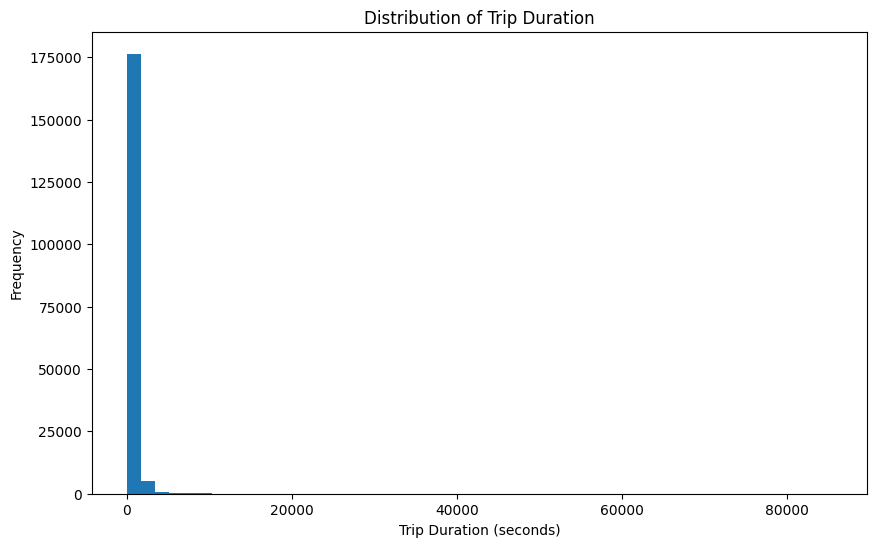

In [8]:
#plot histogram
plt.figure(figsize=[10,6])
plt.hist(df['duration_sec'], bins = 50)
plt.title('Distribution of Trip Duration')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

From above we can see that the histogram is highly skewed due to the presence of few large values in 'duration_sec' column.
Lets try to solve it by filtering out the outliers.

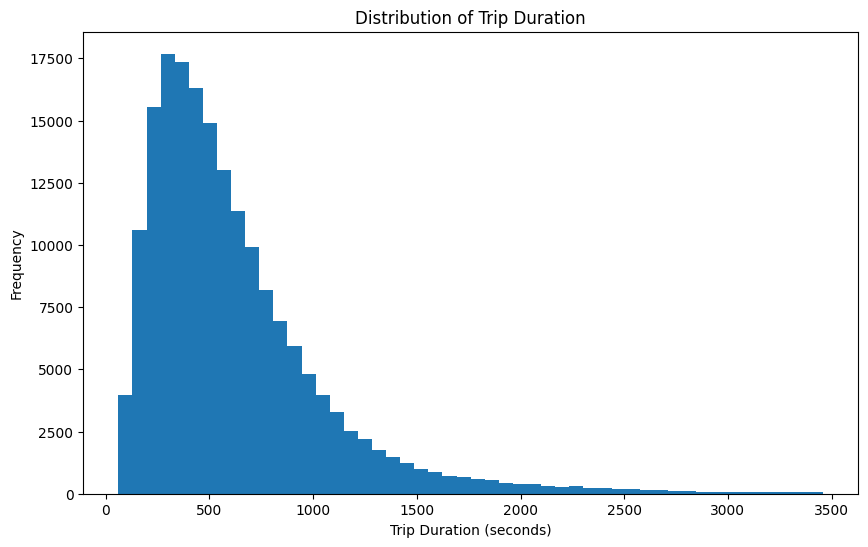

In [9]:
#Function to Filtered out values above the given  percentile

def filter_outliers(data, column,percentile =0.99):
    percentile_value = data[column].quantile(percentile)
    return data[data[column] <= percentile_value]

#Filter out outliers    
filtered_data = filter_outliers(df, 'duration_sec')

#plot histogram
plt.figure(figsize=[10,6])
plt.hist(filtered_data['duration_sec'], bins = 50)
plt.title('Distribution of Trip Duration')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

now, after filtering out trips beyond the 99th percentile, we don't see extremely long trips in this plot.
The histogram shows that most trip duration are on the shorter side, with a long tail extending to the right for long trips.
The highest frequency of trips appears to be around the 200-600 second range, approximately 3 to 10 minutes.
As trip duration increases, the frequency gradually decreases- fewer users take longer trips.

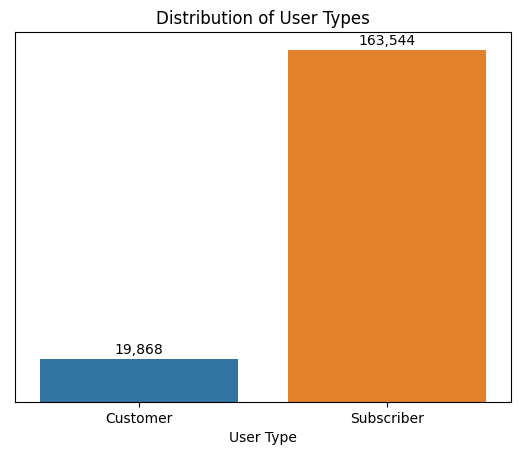

In [10]:
#Now lets explore  the number of Subscribers Vs Customers using a count plot
#Feature:user_type

ax = sns.countplot(x='user_type', data=df)
plt.title('Distribution of User Types')
plt.xlabel('User Type')

#remove the y-axis label and ticks
ax.get_yaxis().set_visible(False) #hide the y-axis 

#Add count labels on top of each bar

for p in plt.gca().patches:
    count = int(p.get_height()) #get the count value of each bar
    plt.text(p.get_x() + p.get_width() / 2, count + 1000, #position of the text at the center and above each bar
             f'{count:,}', ha='center', va ='bottom') #to format the number with commas as thousands separators
    


plt.show()

we can see from above that majority of users are 'Subscribers', compared to a much smaller count of 'Customers'.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The variable of interest - 'duration_sec', represent the duration of each trip in seconds.
The distribution of duartion_sec is highly right-skewed.
There were some unusually long duartion in the dataset, those outliers distorted the histogram, making it difficult to analyze the bulk of the data. Hence I filtered out the outliers by limiting the data do the 99th percentile of duration_sec, making the distribution more readable without the influence of extreme values.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

yes, the distribution of  duration_sec variable was heavily skewed to the right. As we can see from above I prefered to show also the "draft" plot histogram in order to reflect this issue.Those outliers were significantly higher than the majority of the data and affected the readability of the histogram plot.
To improve the visualization, I filtered out the top 1% of longest trips. 
This opertion helped me to focus on the main range of values, allowing a clearer view.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your data. Make sure the variables that you cover here have been introduced in some fashion in the previous section (univariate exploration).

> **Rubric Tip**: This part (Bivariate Exploration) should include at least one scatter plot, one box plot, and at least one clustered bar chart or heat map.

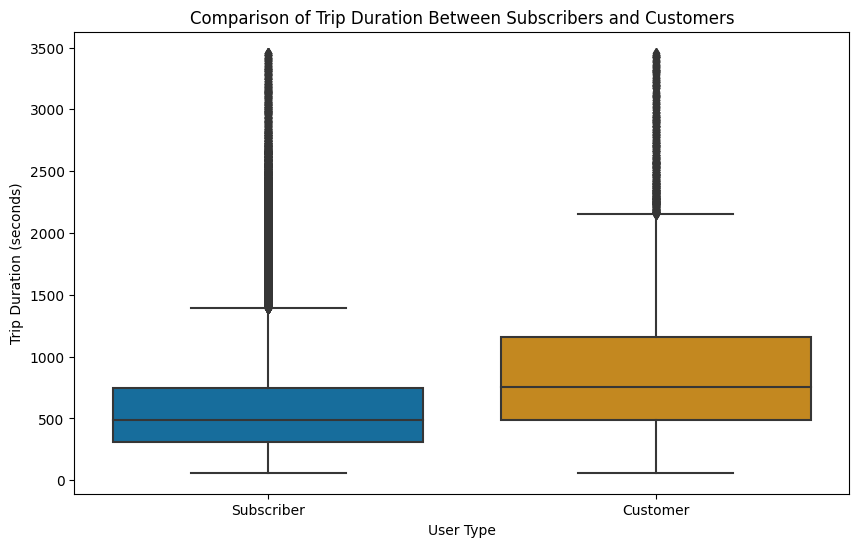

In [22]:
#lets compare the distribution of trip durations between Subscribers and Customers using a Box plot
#Features: user_type, duration_sec

plt.figure(figsize=[10,6])
sns.boxplot(x='user_type', y='duration_sec', data=filtered_data) #call the filter_outliers() function and reuse the filtered data
plt.title('Comparison of Trip Duration Between Subscribers and Customers')
plt.xlabel('User Type')
plt.ylabel('Trip Duration (seconds)')
plt.show()

From above box plot we can see that Customers tend to take longer trips on average, with a wider range of trip durations, 
while Subscribers generally have shorter, more consistent trip durations.
Subscribers generally have a more compact range of trip duration, with fewer extremely long trips compared to Customers, who show a wider range and more frequent instances of longer trips.

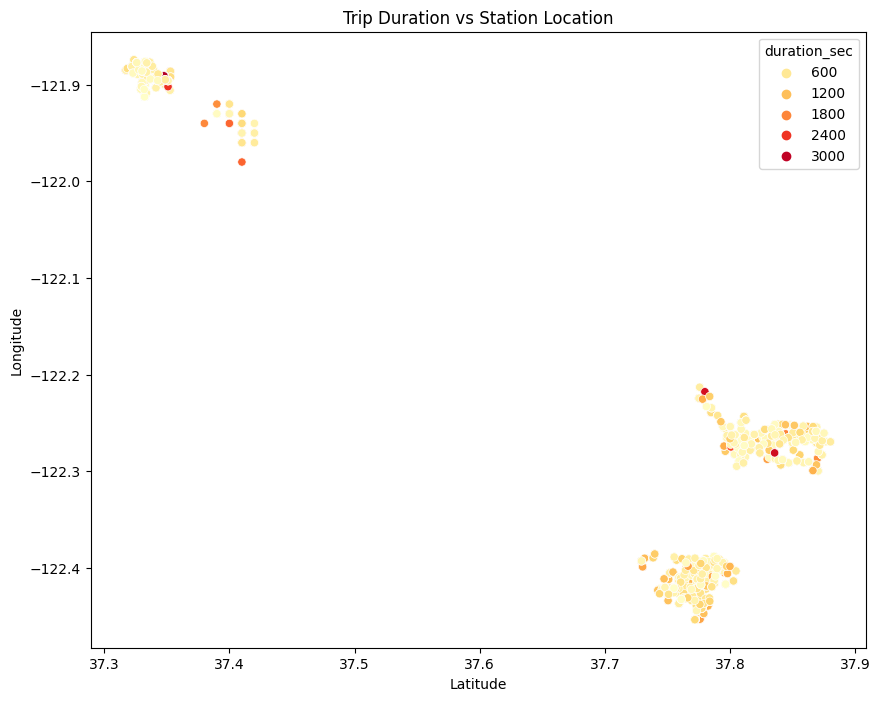

In [17]:
#Now I want to check Trip duration vs Latitude and Lonitude using a scatter plot to visualize the reletionship between geographic location and trip 
#duration, identifying if certain areas have longer trips

plt.figure(figsize=(10, 8))
sns.scatterplot(x='start_station_latitude', y='start_station_longitude', hue='duration_sec', data=filtered_data, palette='YlOrRd' ) #call the filter_outliers() function and reuse the filtered data
plt.title('Trip Duration vs Station Location')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

From above we can see that the data points are clustered in specific geographocal areas, indicating that trips are concentrated in certain regions. Some areas have a higher concentration of longer trips compared to others.

In [13]:
#now I will create a new column 'Age' from 'member_birth_year'

df['Age'] = (2024 - df['member_birth_year']).astype(int)
df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Age
0,52185,32:10.1,01:56.0,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,40
2,61854,13:13.2,24:08.1,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,52
3,36490,54:26.0,02:36.8,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,35
4,1585,54:18.5,20:44.1,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,50
5,1793,49:58.6,19:51.8,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,65
6,1147,55:35.1,14:42.6,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No,41
7,1615,41:06.8,08:02.8,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No,35
8,1570,41:48.8,07:59.7,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No,36
9,1049,49:47.7,07:17.0,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No,32
10,458,57:57.2,05:35.4,370.0,Jones St at Post St,37.787327,-122.413278,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5318,Subscriber,1996.0,Female,Yes,28


In [12]:
#I want to understand if there is a relationship between trip duration and user age(member_birth_year) by using a Scatter plot
#Features: duration_sec, member_birth_year
#I already checked above and I saw that there are some non-null entries for member_birth_year(df.info()), I will drop those rows first as there is no significant impact on the results for this small portion of the data.

df.dropna(subset=['member_birth_year'], inplace=True)
df.info()          

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             175147 non-null  int64  
 1   start_time               175147 non-null  object 
 2   end_time                 175147 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   175147 non-null  float64
 6   start_station_longitude  175147 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     175147 non-null  float64
 10  end_station_longitude    175147 non-null  float64
 11  bike_id                  175147 non-null  int64  
 12  user_type                175147 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [53]:
#Calculate the average age for each data point
df['average_age_by_user_type'] = df.groupby('user_type')['Age'].transform('mean')


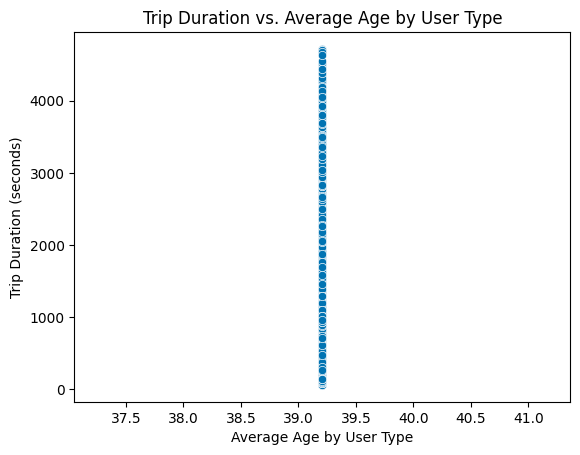

In [55]:
#List of columns to filter outliers
columns_to_filter = ['duration_sec', 'Age', 'average_age_by_user_type']

#loop througe each column and filter out outliers
filtered_data = df
for column in columns_to_filter:
    filtered_data = filter_outliers(filtered_data, column)

#Create a a Scatter plot to check the relationship between trip duration and user age

sns.scatterplot(x='average_age_by_user_type', y='duration_sec', data=filtered_data) #call the filter_outliers() function and reuse the filtered data
plt.title('Trip Duration vs. Average Age by User Type')
plt.xlabel('Average Age by User Type')
plt.ylabel('Trip Duration (seconds)')
plt.show()

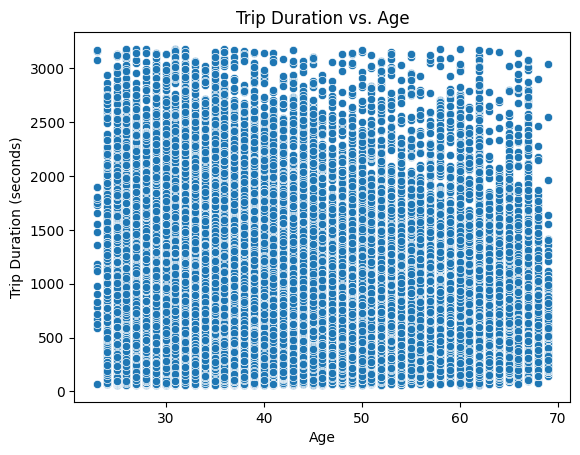

In [15]:
#List of columns to filter outliers
columns_to_filter = ['duration_sec', 'Age' ]

#loop througe each column and filter out outliers
filtered_data = df
for column in columns_to_filter:
    filtered_data = filter_outliers(filtered_data, column)

#Create a a Scatter plot to check the relationship between trip duration and user age

sns.scatterplot(x='Age', y='duration_sec', data=filtered_data) #call the filter_outliers() function and reuse the filtered data
plt.title('Trip Duration vs. Age')
plt.xlabel('Age')
plt.ylabel('Trip Duration (seconds)')
plt.show()

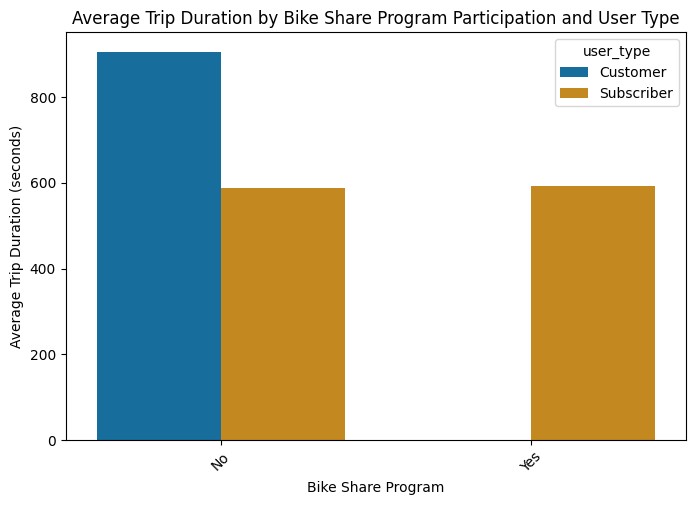

In [23]:
#Bike Share Program vs. Trip Duration: I want to explore the impact of bike share programs and user type on trip duration using a clustered bar chart
plt.figure(figsize=(8,6))
sns.barplot(x='bike_share_for_all_trip', y=filtered_data['duration_sec'], hue='user_type', data=df, errorbar=None)
plt.title('Average Trip Duration by Bike Share Program Participation and User Type')
plt.xlabel('Bike Share Program')
plt.ylabel('Average Trip Duration (seconds)')
plt.xticks(rotation=45)

#Adjust bin width
plt.gcf().subplots_adjust(bottom=0.2)

plt.show()

Above plot shows that the average trip duration for subscribers who participate in the bike-sharing program is significantly higher than that of customers.
This suggest that subscribers, who likely have a more frequent and commited usage of the bike-sharing service, tend to take longer trips compared to occasional customers.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

> **Rubric Tip**: This part (Multivariate Exploration) should include at least one Facet Plot, and one Plot Matrix or Scatterplot with multiple encodings.

>**Rubric Tip**: Think carefully about how you encode variables. Choose appropriate color schemes, markers, or even how Facets are chosen. Also, do not overplot or incorrectly plot ordinal data.

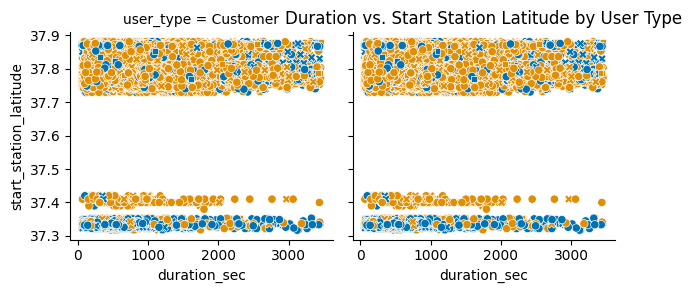

In [26]:
g = sns.FacetGrid(df, col="user_type", col_wrap=4, height=3)
g.map(sns.scatterplot, 
x= filtered_data['duration_sec'], y=filtered_data['start_station_latitude'], hue=filtered_data['bike_share_for_all_trip'], 
style=filtered_data['member_gender'])
plt.title('Duration vs. Start Station Latitude by User Type')
plt.show()

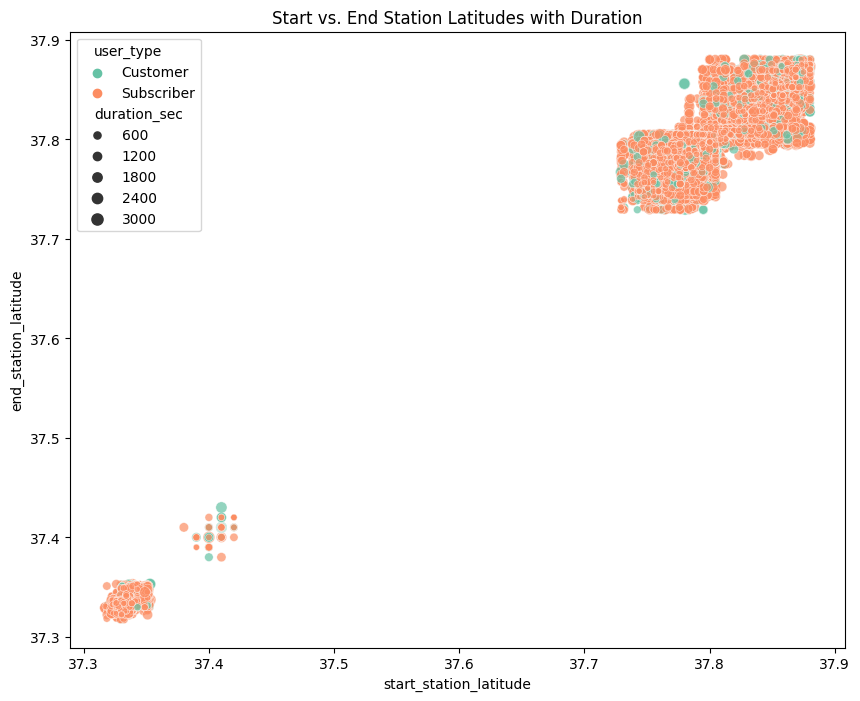

In [14]:
#I want to explore the relationship between the start and end station latitudes of bike trips, with additional information about user type and trip duration encoded
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='start_station_latitude', y='end_station_latitude', hue='user_type', size=filtered_data['duration_sec'], alpha=0.7)
plt.title('Start vs. End Station Latitudes with Duration')
sns.set_palette('colorblind')
plt.show()

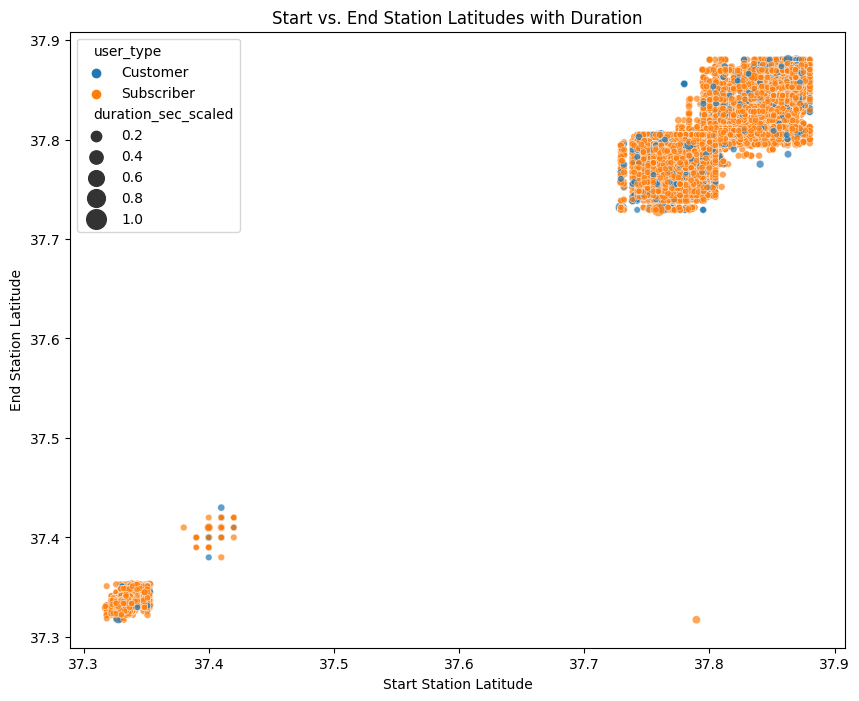

In [13]:
df['duration_sec_scaled'] = df['duration_sec'] / df['duration_sec'].max()
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='start_station_latitude', y='end_station_latitude', hue='user_type', 
                size='duration_sec_scaled', alpha=0.7, sizes=(20, 200))
plt.title('Start vs. End Station Latitudes with Duration')
plt.xlabel('Start Station Latitude')
plt.ylabel('End Station Latitude')
sns.set_palette('Set2')
plt.show()

From above we can see that points are clustered in certain regions, indicating that many trips start and end within specific geographic areas.
The two user types, Subscribers and Customers, seems to have distinct patterns. subscriber trips are more concentrated in certain areas.regaridng trip duration, we can see that longer trips tend to occur within specific geographic areas.


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.

> **Rubric Tip**: Create a list of summary findings to make it easy to review.

> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML.


> At the end of your report, make sure that you export the notebook as an html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep track of where the exported file goes, so you can put it in the same folder as this notebook for project submission. Also, make sure you remove all of the quote-formatted guide notes like this one before you finish your report!

